In [2]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def Data_Split(df, test_to_all_ratio):
    #test size in ratio
    test_size = round(test_to_all_ratio * len(df))
    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    return train_df, test_df

In [4]:
def KNN(train_df, test_df, k = 5, p = 2):
    predictions = []
    train_df_updated = train_df.drop(['label'], axis=1)
    test_df_updated = test_df.drop(['label'], axis=1)
    for i in test_df_updated.values:
        dist = []
        itr = 0
        for j in train_df_updated.values:
            euc_distance_list = (abs(i - j)) ** p
            actual_distance = 0
            for z in range(0, len(euc_distance_list)):
                actual_distance += euc_distance_list[z]
            actual_distance = actual_distance ** (1/p)
            dist.append([actual_distance, itr])
            itr += 1
        dist.sort()
        counts_store = []
        for j in range(k):
            counts_store.append(train_df.values[dist[j][1]][-1])
        labels, label_counts = np.unique(counts_store, return_counts=True)
        predictions.append(labels[np.argmax(label_counts)])
    #print(predictions)
    #print(test_df['label'].tolist())
    pred_label, pred_label_counts = np.unique(predictions, return_counts=True)
    test_label, test_label_counts = np.unique(test_df['label'], return_counts=True)
        
    tp_counts = [0] * len(pred_label)
    
    for i in range(len(predictions)):
        if predictions[i] == test_df.values[i][-1]:
            tp_counts[pred_label.tolist().index(predictions[i])] += 1    
    
    accuracy = sum(tp_counts) / len(predictions)
    temp = 0
    for i in range(len(pred_label)):
        temp += tp_counts[i] / pred_label_counts[i]
    precision = temp / len(pred_label)
    temp = 0
    for i in range(len(pred_label)):
        temp += tp_counts[i] / test_label_counts[i]
    recall = temp / len(test_label)
    f1 = 2 / ((1 / recall) + (1 / precision))
    return accuracy, precision, recall, f1

## Q-1-1-1

In [5]:
cols = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
df = pd.read_csv('Datasets/Robot1', header=None, names=cols,delim_whitespace=True)
df['label'] = df['class']
df = df.drop(['class'], axis=1)
df = df.drop(['id'], axis=1)

In [6]:
# random.seed(0)
#train_df, test_df = Data_Split(df, 0.2)
size = round(len(df) * 0.8)
train_df = df[:size]
test_df = df[size:]
accuracy, precision, recall, f1 = KNN(train_df, test_df)
print("accuracy is ", accuracy * 100)
print("Precision is ", precision * 100)
print("Recall is ", recall * 100)
print("F1 score is ", f1)


accuracy is  76.0
Precision is  65.80882352941177
Recall is  75.59523809523809
F1 score is  0.7036337749164293


## Q1-1-2

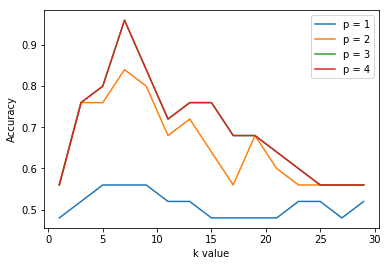

In [121]:
x_total = []
preds_total = []
for j in range(1, 5):
    x = []
    preds = []
    for i in range (1, 30, 2):
        acc, _, _, _ = KNN(train_df, test_df, i, j)
        #print(acc)
        x.append(i)
        preds.append(acc)
    
    x_total.append(x)
    preds_total.append(preds)

for i in range(4):
    plt.plot(x_total[i], preds_total[i], label= "p = " + str(i + 1))

plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

## Q1-2-1

In [122]:
cols = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
df = pd.read_csv('/home/vivek/Documents/SMAI/Assignments/Assignment_2/RobotDataset/Robot2', header=None, names=cols,delim_whitespace=True)
df['label'] = df['class']
df = df.drop(['class'], axis=1)
df = df.drop(['id'], axis=1)

In [7]:
# random.seed(0)
#train_df, test_df = Data_Split(df, 0.2)
#test_df.shape
size = round(len(df) * 0.8)
train_df = df[:size]
test_df = df[size:]
accuracy, precision, recall, f1 = KNN(train_df, test_df)
print("accuracy is ", accuracy * 100)
print("Precision is ", precision * 100)
print("Recall is ", recall * 100)
print("F1 score is ", f1)


accuracy is  76.0
Precision is  65.80882352941177
Recall is  75.59523809523809
F1 score is  0.7036337749164293


## Q1-2-2

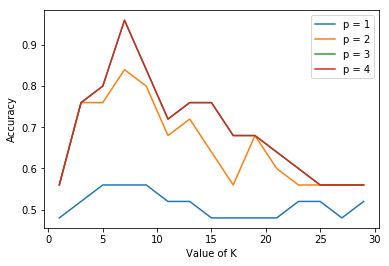

In [8]:
x_total = []
preds_total = []
for j in range(1, 5):
    x = []
    preds = []
    for i in range (1, 30, 2):
        acc, _, _, _ = KNN(train_df, test_df, i, j)
        #print(acc)
        x.append(i)
        preds.append(acc)
    
    x_total.append(x)
    preds_total.append(preds)

for i in range(4):
    plt.plot(x_total[i], preds_total[i], label= "p = " + str(i + 1))

plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Q2-1 (Iris dataset)

In [130]:
cols = ['sl', 'sw', 'pl', 'pw', 'label']
df = pd.read_csv('/home/vivek/Documents/SMAI/Assignments/Assignment_2/Iris/Iris.csv', header=None, names=cols)

In [136]:
size = round(len(df) * 0.8)
train_df = df[:size]
test_df = df[size:]
accuracy, precision, recall, f1 = KNN(train_df, test_df)
print("accuracy is ", accuracy * 100)
print("Precision is ", precision * 100)
print("Recall is ", recall * 100)
print("F1 score is ", f1)

accuracy is  96.29629629629629
Precision is  95.23809523809524
Recall is  96.66666666666667
F1 score is  0.9594706368899917


## Q2-2 (Iris Dataset)

NameError: name 'ylim' is not defined

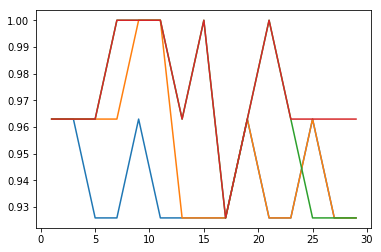

In [135]:
x_total = []
preds_total = []
for j in range(1, 5):
    x = []
    preds = []
    for i in range (1, 30, 2):
        acc, _, _, _ = KNN(train_df, test_df, i, j)
        #print(acc)
        x.append(i)
        preds.append(acc)
    
    x_total.append(x)
    preds_total.append(preds)

for i in range(4):
    plt.plot(x_total[i], preds_total[i], label= "p = " + str(i + 1))

plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()